In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from utils import *
from numba import vectorize, cuda
#import mdptoolbox

In [2]:
a=np.zeros(shape=(10,10))
print(a)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [3]:
a[9,9]=10
print(a)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  10.]]


In [4]:
b=np.zeros(shape=(10,10))
print(b)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [5]:
b[1,4]=b[1,5]=b[1,6]=-100
b[2,4]=b[3,4]=b[4,4]=b[5,4]=b[6,4]=-100
b[2,6]=b[3,6]=-100
b[3,7]=b[3,8]=-100
b[4,8]=b[5,8]=b[6,8]=b[7,8]=-100
b[7,7]=b[7,6]=-100
b[8,6]=-100
b[9,9]=10
print(b)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100. -100. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.   10.]]


#
Question 1

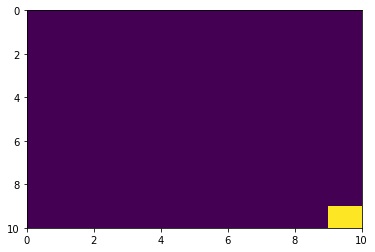

In [6]:

plt.pcolor(a)
plt.gca().invert_yaxis()

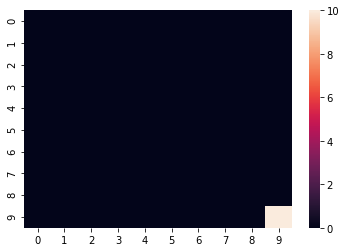

In [7]:
sns.heatmap(a)

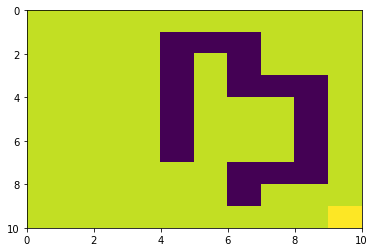

In [8]:
plt.pcolor(b)
plt.gca().invert_yaxis()


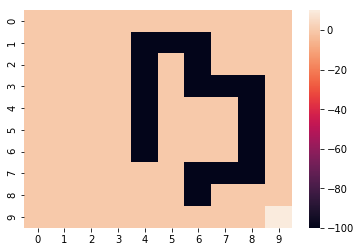

In [9]:
sns.heatmap(b)

#
Question 2

In [10]:
#state space
ss=np.zeros(shape=(10,10))
#print(ss)
for i in range(0,10):
    ss[i,0]=i
    ss[i,1]=i+10
    ss[i,2]=i+20
    ss[i,3]=i+30
    ss[i,4]=i+40
    ss[i,5]=i+50
    ss[i,6]=i+60
    ss[i,7]=i+70
    ss[i,8]=i+80
    ss[i,9]=i+90
print(ss)

[[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90.]
 [  1.  11.  21.  31.  41.  51.  61.  71.  81.  91.]
 [  2.  12.  22.  32.  42.  52.  62.  72.  82.  92.]
 [  3.  13.  23.  33.  43.  53.  63.  73.  83.  93.]
 [  4.  14.  24.  34.  44.  54.  64.  74.  84.  94.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95.]
 [  6.  16.  26.  36.  46.  56.  66.  76.  86.  96.]
 [  7.  17.  27.  37.  47.  57.  67.  77.  87.  97.]
 [  8.  18.  28.  38.  48.  58.  68.  78.  88.  98.]
 [  9.  19.  29.  39.  49.  59.  69.  79.  89.  99.]]


In [11]:
#action set
def action(self,command):
    if command=="Move Right":
        
    elif command=="Move Left":
        
    elif command =="Move Top":
        
    elif command =="Move Down":
        
    else:
        
        


IndentationError: expected an indented block (<ipython-input-11-b841efdbd6b5>, line 5)

In [12]:
#Transition Probilitiy 
w=0.1
def tp(self,state,action):
    if action ==None:
        return [0.0,state]
    else:
        return [(1-w+w/4,self.go(state,action)),
                (w/4,self.go(state,turn_left(action))),
                (w/4,self.go(state,turn_right(action))),
                (w/4,self.go(state,turn_bottom(action)))]
    

In [13]:
### Test

In [95]:
class MDP:

    """A Markov Decision Process, defined by an initial state, transition model,
    and reward function. We also keep track of a gamma value, for use by
    algorithms. The transition model is represented somewhat differently from
    the text. Instead of P(s' | s, a) being a probability number for each
    state/state/action triplet, we instead have T(s, a) return a
    list of (p, s') pairs. We also keep track of the possible states,
    terminal states, and actions for each state. [page 646]"""

    def __init__(self, init, actlist, terminals, transitions = {}, reward = None, states=None, gamma=.9):
        if not (0 < gamma <= 1):
            raise ValueError("An MDP must have 0 < gamma <= 1")

        if states:
            self.states = states
        else:
            ## collect states from transitions table
            self.states = self.get_states_from_transitions(transitions)
            
        
        self.init = init
        
        if isinstance(actlist, list):
            ## if actlist is a list, all states have the same actions
            self.actlist = actlist
        elif isinstance(actlist, dict):
            ## if actlist is a dict, different actions for each state
            self.actlist = actlist
        
        self.terminals = terminals
        self.transitions = transitions
        if self.transitions == {}:
            print("Warning: Transition table is empty.")
        self.gamma = gamma
        if reward:
            self.reward = reward
        else:
            self.reward = {s : 0 for s in self.states}
        #self.check_consistency()

    def R(self, state):
        """Return a numeric reward for this state."""
        return self.reward[state]

    def T(self, state, action):
        """Transition model. From a state and an action, return a list
        of (probability, result-state) pairs."""
        if(self.transitions == {}):
            raise ValueError("Transition model is missing")
        else:
            return self.transitions[state][action]

    def actions(self, state):
        """Set of actions that can be performed in this state. By default, a
        fixed list of actions, except for terminal states. Override this
        method if you need to specialize by state."""
        if state in self.terminals:
            return [None]
        else:
            return self.actlist

    def get_states_from_transitions(self, transitions):
        if isinstance(transitions, dict):
            s1 = set(transitions.keys())
            s2 = set([tr[1] for actions in transitions.values() 
                              for effects in actions.values() for tr in effects])
            return s1.union(s2)
        else:
            print('Could not retrieve states from transitions')
            return None

    def check_consistency(self):
        # check that all states in transitions are valid
        assert set(self.states) == self.get_states_from_transitions(self.transitions)
        # check that init is a valid state
        assert self.init in self.states
        # check reward for each state
        #assert set(self.reward.keys()) == set(self.states)
        assert set(self.reward.keys()) == set(self.states)
        # check that all terminals are valid states
        assert all([t in self.states for t in self.terminals])
        # check that probability distributions for all actions sum to 1
        for s1, actions in self.transitions.items():
            for a in actions.keys():
                s = 0
                for o in actions[a]:
                    s += o[0]
                assert abs(s - 1) < 0.001

In [15]:
# Transition Matrix as nested dict. State -> Actions in state -> List of (Probability, State) tuples
t = {
    "A": {
            "X": [(0.3, "A"), (0.7, "B")],
            "Y": [(1.0, "A")]
         },
    "B": {
            "X": {(0.8, "End"), (0.2, "B")},
            "Y": {(1.0, "A")}
         },
    "End": {}
}

init = "A"

terminals = ["End"]

rewards = {
    "A": 5,
    "B": -10,
    "End": 100
}

In [16]:

class CustomMDP(MDP):
    def __init__(self, init, terminals, transition_matrix, reward = None, gamma=.9):
        # All possible actions.
        actlist = []
        for state in transition_matrix.keys():
            actlist.extend(transition_matrix[state])
        actlist = list(set(actlist))
        MDP.__init__(self, init, actlist, terminals, transition_matrix, reward, gamma=gamma)

    def T(self, state, action):
        if action is None:
            return [(0.0, state)]
        else: 
            return self.transitions[state][action]

In [17]:
our_mdp = CustomMDP(init, terminals, t, rewards, gamma=.9)

In [93]:
our_mdp.actions('B')
#t['A']

['Y', 'X']

In [19]:
our_mdp.T("B", "X")

{(0.2, 'B'), (0.8, 'End')}

In [20]:
our_mdp.R("B")

-10

In [78]:
our_mdp.get_states_from_transitions(t)

{'A', 'B', 'End'}

In [21]:
our_mdp.transitions

{'A': {'X': [(0.3, 'A'), (0.7, 'B')], 'Y': [(1.0, 'A')]},
 'B': {'X': {(0.2, 'B'), (0.8, 'End')}, 'Y': {(1.0, 'A')}},
 'End': {}}

In [71]:
k = our_mdp.transitions.keys()
k = set(k)
k

{'A', 'B', 'End'}

In [72]:
vv = our_mdp.transitions.values()
vv

[{'X': [(0.3, 'A'), (0.7, 'B')], 'Y': [(1.0, 'A')]},
 {'X': {(0.2, 'B'), (0.8, 'End')}, 'Y': {(1.0, 'A')}},
 {}]

In [73]:
vvv = vv[0].values()
vvv

[[(1.0, 'A')], [(0.3, 'A'), (0.7, 'B')]]

In [84]:
tr = vvv[0]
tr = tr[0][1]
#tr
tr = set(tr)
k.union(tr)

{'A', 'B', 'End'}

In [99]:
### GridMDP

In [123]:
class GridMDP(MDP):

    """A two-dimensional grid MDP, as in [Figure 17.1]. All you have to do is
    specify the grid as a list of lists of rewards; use None for an obstacle
    (unreachable state). Also, you should specify the terminal states.
    An action is an (x, y) unit vector; e.g. (1, 0) means move east."""

    def __init__(self, grid, terminals, init=(0, 0), gamma=.9):
        grid.reverse()  # because we want row 0 on bottom, not on top
        reward = {}
        states = set()
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.grid = grid
        for x in range(self.cols):
            for y in range(self.rows):
                if grid[y][x] is not None:
                    states.add((x, y))
                    reward[(x, y)] = grid[y][x]
        self.states = states
        actlist = orientations
        transitions = {}
        for s in states:
            transitions[s] = {}
            for a in actlist:
                transitions[s][a] = self.calculate_T(s, a)
        MDP.__init__(self, init, actlist=actlist,
                     terminals=terminals, transitions = transitions, 
                     reward = reward, states = states, gamma=gamma)

    def calculate_T(self, state, action):
        if action is None:
            return [(0.0, state)]
        else:
            return [(0.8, self.go(state, action)),
                    (0.1, self.go(state, (1,0))),
                    (0.1, self.go(state, (-1,0)))]
    
    def T(self, state, action):
        if action is None:
            return [(0.0, state)]
        else:
            return self.transitions[state][action]
 
    def go(self, state, direction):
        """Return the state that results from going in this direction."""
        #state1 = vector_add(state, direction)
        state1 = state + direction
        return state1 if state1 in self.states else state

    def to_grid(self, mapping):
        """Convert a mapping from (x, y) to v into a [[..., v, ...]] grid."""
        return list(reversed([[mapping.get((x, y), None)
                               for x in range(self.cols)]
                              for y in range(self.rows)]))

    def to_arrows(self, policy):
        chars = {
            (1, 0): '>', (0, 1): '^', (-1, 0): '<', (0, -1): 'v', None: '.'}
        return self.to_grid({s: chars[a] for (s, a) in policy.items()})

In [124]:
orientations = {
    (0,0): {
            (1,0): [(1.0, (1,0))],
            (0,1): [(1.0, (0,1))]
         },
    (1,0): {
            (-1,0): [(1.0, (0,0))],
            (0,1): [(1.0, (1,1))]
         },
    (0,1): {
            (1,0): [(1.0, (1,1))],
            (0,1): [(1.0, (0,2))],
            (0,-1): [(1.0, (0,0))],
         },
    (1,1): {
            (-1,0): [(1.0, (0,1))],
            (0,1): [(1.0, (1,2))],
            (0,-1): [(1.0, (1,0))],
         },
    (0,2): {
            (1,0): [(1.0, (1,2))],
            (0,-1): [(1.0, (0,1))]
         },
    (1,2): {}
}

In [126]:
g = GridMDP([[-0.04, +1],
        [-0.04, None],
        [-0.04, -0.04]],
        terminals=[(1, 2)])

In [136]:
g.go((1,1), (0,1))

(1, 1)

In [ ]:
pi = best_policy(pi, value_iteration(pi, .001))
print_table(g.to_arrow(pi))